In [152]:
class Linmod_exp_trans:
    def __init__(self,x,y):
        X = np.c_[np.ones(len(x)),x] #Model matrix expansion to add 1's for the intercept
        coeff = np.linalg.inv(X.T@X)@(X.T)@y #calculate the coefficients for the ols regression
        self.coeff = coeff #assign coeff to self
        self.fitted = np.exp((self.coeff[0] + self.coeff[1]*x)) #Fit values. Notice the exponential function particular for this exercise  
        self.mse = np.mean((np.exp(y)-self.fitted)**2) #Calculate mean squared error
        self.R2 = 1-self.mse/np.mean((np.exp(y)-np.mean( np.exp(y) ) )**2) #Calculate R^2 value




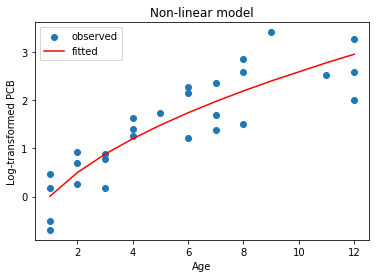

In [153]:
import numpy as np
import matplotlib.pyplot as plt
df = np.loadtxt("PCB.dt") # Load data
age = df[:,0] # Sample space
PCB = df[:,1] # Original label space
logPCB = np.log(PCB) # Transformed label space


##Plot for første model
plt.scatter(age, logPCB, label = "observed")
plt.plot(age, np.log(Linmod_exp_trans(age, logPCB).fitted), color ="red", label = "fitted")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Log-transformed PCB")
plt.title("Linear model")
plt.savefig("ex2_1.png")
plt.close()

#Plot for anden model
plt.scatter(age, logPCB, label = "observed")
plt.plot(np.sort(age), np.sort(np.log(Linmod_exp_trans(age**(1/2), logPCB).fitted)), color ="red", label = "fitted")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Log-transformed PCB")
plt.title("Non-linear model")
plt.savefig("ex2_2.png")



